In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [3]:
data = pd.read_csv("../../data/clean_survey_data/2019_clean.csv", low_memory=False)
nuts = data[data["groundnuts"] == 1]
nuts = nuts[nuts.columns.drop(list(nuts.filter(regex="so_.*")))]

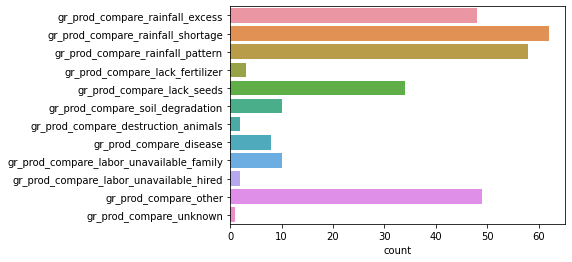

In [4]:
# Rainfall is one of the main rasons for decreased productivity
compare = ["gr_prod_compare_rainfall_excess", "gr_prod_compare_rainfall_shortage", "gr_prod_compare_rainfall_pattern",
           "gr_prod_compare_lack_fertilizer", "gr_prod_compare_lack_seeds", "gr_prod_compare_soil_degradation",
           "gr_prod_compare_destruction_animals", "gr_prod_compare_disease",
           "gr_prod_compare_labor_unavailable_family", "gr_prod_compare_labor_unavailable_hired",
           "gr_prod_compare_other", "gr_prod_compare_unknown"]
compare_reasons = pd.DataFrame(nuts[nuts["gr_prod_compare"] >= 5][compare].sum(), columns=["count"])
sns.barplot(data=compare_reasons, y=compare_reasons.index, x="count")
plt.show()

Text(0.5, 0.98, "Answers to the question 'How does the yield this year compare to normal?'\n red: worse, orange: normal, green: better, grey: no comparison")

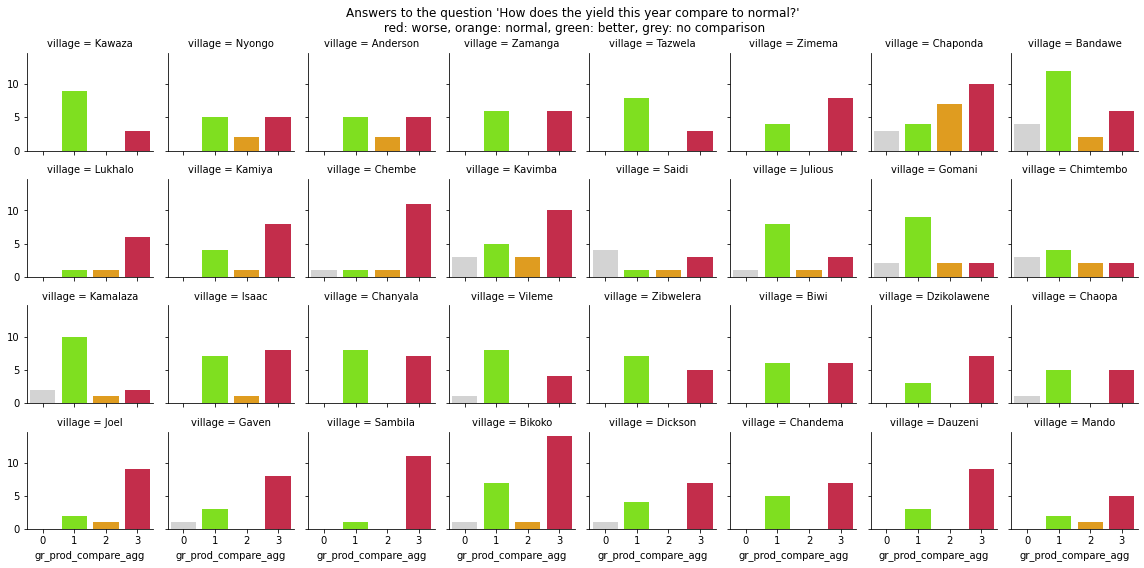

In [7]:
# aggregate into larger groups
# 0: did not grow 1: better 2: same 3: worse
nuts["gr_prod_compare_agg"] = nuts.apply(lambda row: 0 if row.gr_prod_compare == 1 else
                                         1 if row.gr_prod_compare in (2,3) else
                                        2 if row.gr_prod_compare == 4 else
                                        3, axis=1)
# color map
colormap = {
    0: "lightgray",
    1: "chartreuse",
    2: "orange",
    3: "crimson"
}
# Within one village, was the production better or worse? Is there a trend visible?
g = sns.FacetGrid(nuts, col="village", col_wrap=8, height=2)
g.map(sns.countplot, "gr_prod_compare_agg", palette=colormap, order=[0,1,2,3])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Answers to the question 'How does the yield this year compare to normal?'\n red: worse, orange: normal, green: better, grey: no comparison")
# in one GPS location (Village), do all farms have the same answer regarding the rainfall pattern?
# even within one city, there are farms in which the production was better and farms in which it was worse
# e.g. Gaven, Dickson
# might be due to non-weather related variables, such as availability of labor

Text(0.5, 0.98, 'Complaints about rainfall:\n red: Rain Shortage, blue: Rain Excess orange: Rain Pattern grey: No complaints')

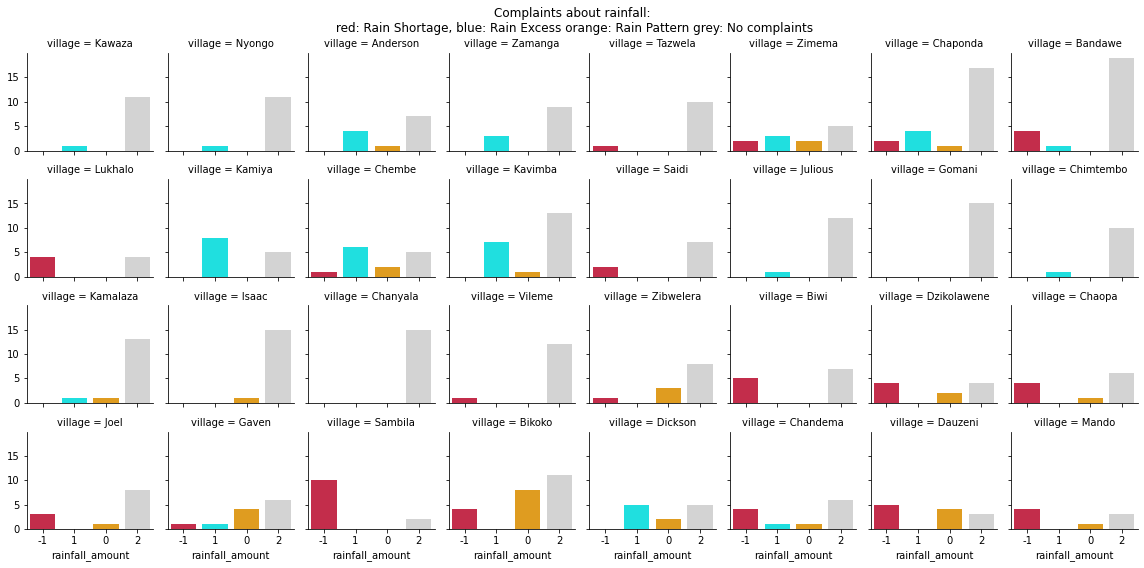

In [10]:
# check whether one farm claims both shortage and excess -> Nope (perfect)
len(nuts.loc[nuts["gr_prod_compare_rainfall_shortage"] + nuts["gr_prod_compare_rainfall_excess"] == 2]) == 0
# thus, we can put them together in one variable
nuts["rainfall_amount"] = nuts.apply(lambda row: 1 if row.gr_prod_compare_rainfall_excess == 1 else
                                     -1 if row.gr_prod_compare_rainfall_shortage == 1 else
                                     0 if row.gr_prod_compare_rainfall_pattern == 1 else
                                     2, axis=1)
colormap = {
    2: "lightgray",
    0: "orange",
    1: "aqua",
    -1: "crimson"
}

# plot how many famers complain about rainfall (shortage / excess) per village
g = sns.FacetGrid(nuts, col="village", col_wrap=8, height=2)
g.map(sns.countplot, "rainfall_amount", order=[-1,1,0,2], palette=colormap)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Complaints about rainfall:\n red: Rain Shortage, blue: Rain Excess orange: Rain Pattern grey: No complaints")
# conclusion:
# rain excess: Anderson, Zamanga, Kamiya, Chembe, Kavimba, Julios, Kamalaza, Chimtembo, Dickson
# rain shortage: Tazwela, Bandawe, Lukhalo, Saidi, Dzikolawene, Biwi, Chaopa, Joel,
#                Sambila, Bikoko, Chandema, Dauzeni, Mando

In [ ]:
# Questions that remain open:
# Within one village: How can one explain which farms complain about the rainfall and which don't?
